# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Descriptive statistics
### VIDEO: Histogram bins
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

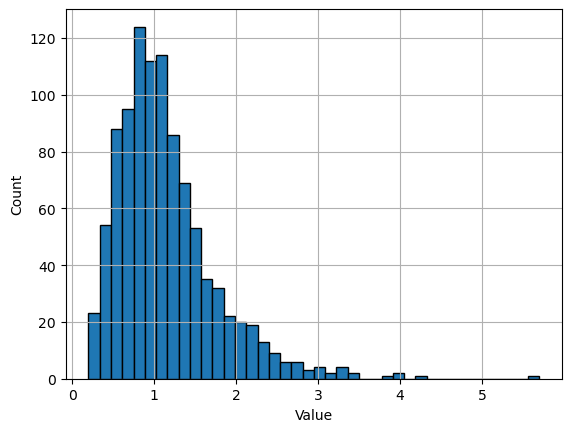

In [16]:
## create some data

# number of data points
n = 1000

# generate log-normal distribution
rng = np.random.default_rng()
data = np.exp(rng.standard_normal(n)/2)

# number of histogram bins
k = 40

# one way to show a histogram
plt.hist(data, k, linewidth=1, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid()
plt.show()

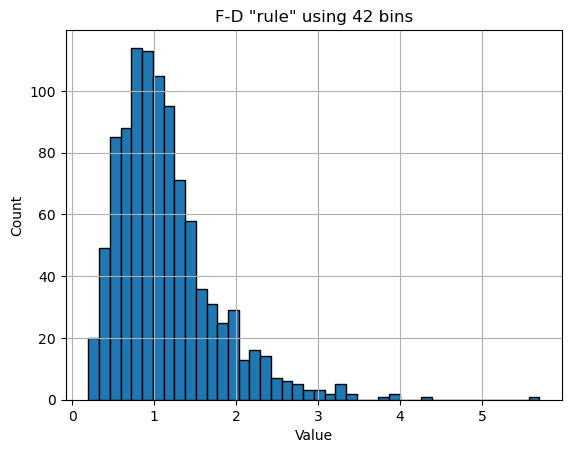

In [17]:
## try the Freedman-Diaconis rule

bin_width = 2*stats.iqr(data)*n**(-1/3)
bin_number = np.ceil((np.max(data) - np.min(data))/bin_width)  #np.floor?

plt.hist(data, int(bin_number), linewidth=1, edgecolor='black')
# or directly from the hist function
# plt.hist(data, bins='fd', linewidth=1, edgecolor='black')
plt.title(f'F-D "rule" using {int(bin_number)} bins')
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid()
plt.show()

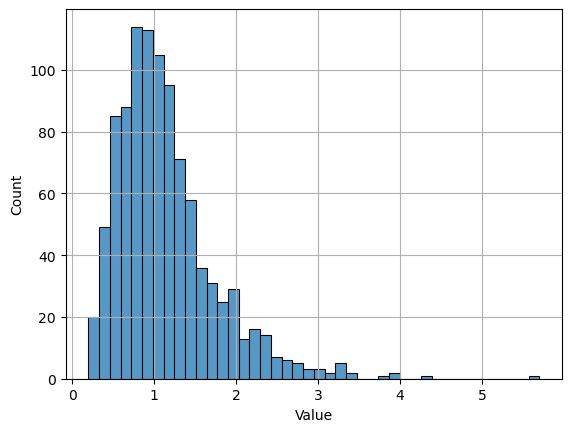

In [19]:
# small aside on Seaborn

import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(data=data, ax=ax);  # uses FD rule by default
ax.set_xlabel("Value")
ax.grid()

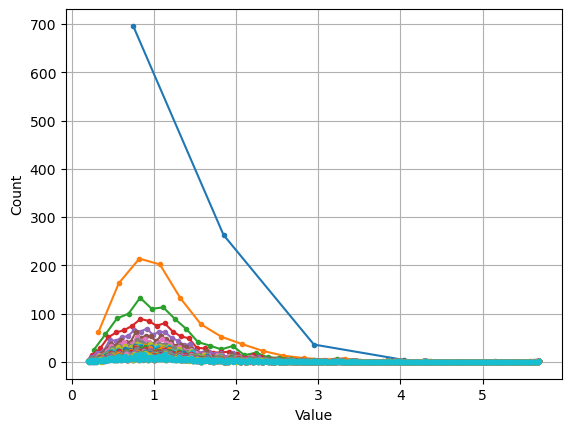

In [20]:
## lots of histograms with increasing bins

bins2try = np.round(np.linspace(5, n/2, 30))

for bini in range(len(bins2try)):
    counts, edges = np.histogram(data, int(bins2try[bini]))
    x = (edges[:-1] + edges[1:])/2
    plt.plot(x, counts, '.-')

plt.xlabel('Value')
plt.ylabel('Count')
plt.grid()